## Hough Transform (Circle detection)

In [18]:
# Import libraries
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from numba import jit
from math import sin, cos, pi

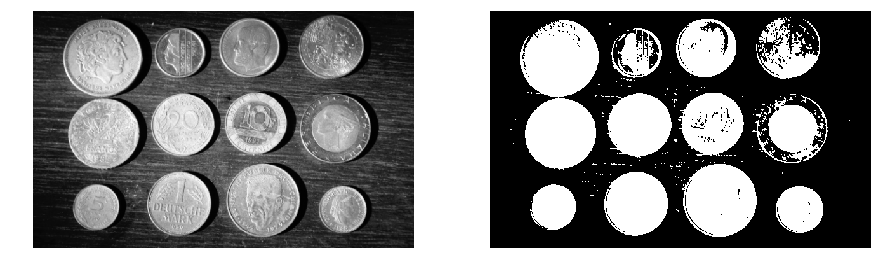

In [17]:
image = cv2.imread('images/coins.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(image_gray,120, 255,cv2.THRESH_BINARY)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(image_gray, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(binary, cmap='gray')

ax1.axis('off')
ax2.axis('off')

plt.show()

In [48]:
@jit
def circle_detection(image,rmin=1,rmax=100,steps=1,threshold=.5):
    points = []
    h,w = image.shape[:2]
    
    max_dx = -9999999999999999
    max_dy = -9999999999999999
    
    # Defining points to be checked
    for r in range(rmin, rmax+1):
        for s in range(steps):
            dx = int(r * cos(2 * pi * (s / steps)))
            dy = int(r * sin(2 * pi * (s / steps)))
            max_dx = max(dx, max_dx)
            max_dy = max(dy, max_dy)            
            points.append((r,dx,dy))
    
    n_radius = steps * (rmax-rmin + 1)
    
    # Defining accumulator values
    M = np.zeros((h+max_dy,w+max_dx,n_radius), dtype=float)
                          
    # Get non-background values
    rows, cols = np.nonzero(image)
    
    for (row,col) in zip(rows,cols):
        for r,x,y in points:
            rx = col + x
            ry = row + y
            M[rx,ry,r] += 1
    
    min_v = np.min(M)
    max_v = np.max(M)
    print(min_v, max_v)

In [ ]:
circle_detection(binary)